# Machine Learning Group Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

pd.set_option('display.max_columns', 50)

In [2]:
from lightgbm import LGBMClassifier
import lightgbm as lgb
from xgboost import XGBClassifier

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

import mglearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer

In [4]:
df = pd.read_csv("./Churn_Modelling.csv")
df.drop(['RowNumber'], axis=1,inplace=True)
df1 = df.copy()

### Introduction

The data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or continues to be a customer.


### First 5 rows of the dataset: 

In [5]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Dataset Description:

<ul>
<li><b>CustomerId</b>: Unique Ids for bank customer identification
<li><b>Surname</b>: Last name of the customer 
<li><b>CreditScore</b>: Credit score of the customer
<li><b>Geography</b>:  The country from which the customer belongs
<li><b>Gender</b>: Gender of the customer (Male/ Female) 
<li><b>Age</b>: Age of the customer
<li><b>Tenure</b>:Number of years for which the customer has been with the bank
<li><b>Balance</b>:Bank balance of the customer
<li><b>NumOfProducts</b>:Number of bank products the customer is utilising
<li><b>HasCrCard</b>: Binary indicator showing the customer holds a credit card with the bank or not
<li><b>IsActiveMember</b>: Binary indicator for whether the customer is an active member with the bank or not
<li><b>EstimatedSalary</b>: Estimated salary of the customer in Dollars
<li><b>Exited</b>: Binary indicator 1 if the customer closed account with bank and 0 if the customer is retained
</ul>
    

### Basic Information of the dataset

In [6]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

##### Plots:

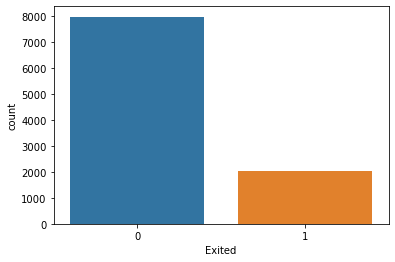

In [8]:
sns.countplot(x='Exited', data=df)

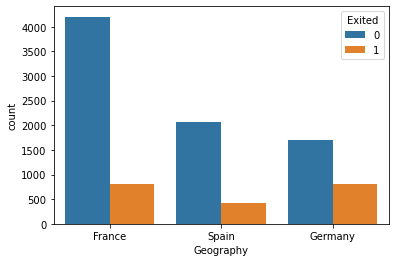

In [9]:
sns.countplot(x='Geography',hue ='Exited', data=df)

Observation: France has the greatest proportion of customers being retained out of all other countries 

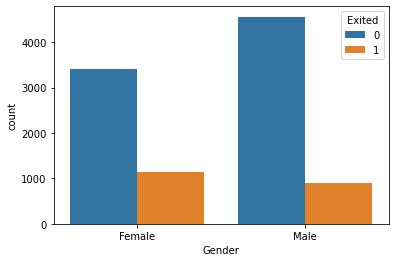

In [10]:
sns.countplot(x='Gender',hue ='Exited', data=df)

Observation: Male customers are likely to be retained compare to that of female

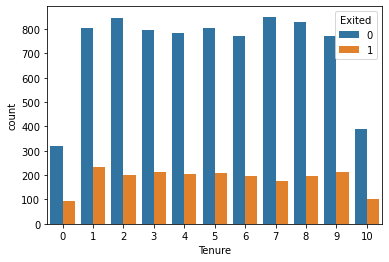

In [11]:
sns.countplot(x='Tenure',hue ='Exited', data=df)

Observation: Most cutsomers have tenure between 1 to 9 year and there is no obvious pattern that the length of tenure will lead to a customer's exit.

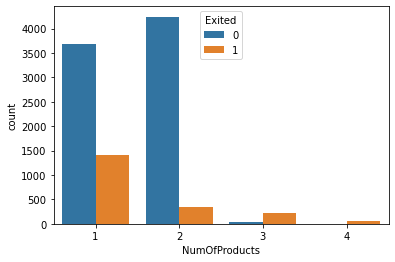

In [12]:
sns.countplot(x='NumOfProducts',hue ='Exited', data=df)

Observation: Majority of the customers are utilising 1 to 2 products of the bank. Also, customers that are utilising 2 products are more likely to be retained than those customers who are only utilising 1 product.

##### First five rows of the dataset:

In [13]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##### Drop all the columns that are not useful

In [14]:
df.drop(columns=['CustomerId','Surname'], inplace=True)

##### Get dummies for categorical variables

In [15]:
df=pd.get_dummies(data=df,columns=['Gender','Geography','HasCrCard','IsActiveMember'])

### Machine Learning Models 

### in list form, what models did we use

In [16]:
y = df['Exited']
X = df.drop(columns='Exited')

##### Split the data into train set and test set

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state=3)

##### Balance the data using over-sampling

In [18]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [19]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

##### Generate pipe for numerical columns

In [20]:
col_num = ['Age', 'Tenure','NumOfProducts','CreditScore','Balance','EstimatedSalary']

In [21]:
pipe_num = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
preprocessor = make_column_transformer((pipe_num, col_num))


pipe = Pipeline([('preprocessing', preprocessor), ('classifier', SVC())])

pipe.fit(X_train_res, y_train_res)
accuracy = pipe.score(X_test, y_test)
print('Accuracy score of the {} is {:.2f}'.format(pipe.__class__.__name__, accuracy))

Accuracy score of the Pipeline is 0.74


#### Logistics Regression

Tuning parameters in Logistic Regression

In [22]:
pipe_log = make_pipeline(preprocessor,
                     LogisticRegression(solver='saga', multi_class='auto',
                                        random_state=42, max_iter=5000))
param_grid = {'logisticregression__C': [0.0001,0.001, 0.01, 0.1, 1, 10],
              'logisticregression__penalty': ['l1', 'l2']}
grid_log = GridSearchCV(pipe_log, param_grid=param_grid,scoring='roc_auc', cv=5, n_jobs=-1, return_train_score=True)
grid_log.fit(X_train_res, y_train_res)
print("Best params:\n{}\n".format(grid_log.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_log.best_score_))
print("Test-set score: {:.5f}".format(grid_log.score(X_test, y_test)))

Best params:
{'logisticregression__C': 0.01, 'logisticregression__penalty': 'l1'}

Best cross-validation score: 0.76141
Test-set score: 0.72837


Heatmap showing the best combination of the above params. Going forward we wanted to study the impact of changing C and penalty. So, we plotted the heat map of penalty versus C. Increasing or decreasing either of them decreases the test set score. We get the best test score for C = 0.01 and L1 penalty

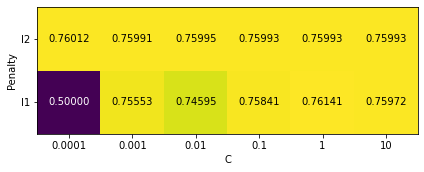

In [23]:
df_grid_log = pd.DataFrame(grid_log.cv_results_)
scores = np.array(df_grid_log.mean_test_score).reshape(2, 6)
mglearn.tools.heatmap(scores, xlabel='C', xticklabels=param_grid['logisticregression__C'],
                      ylabel='Penalty', yticklabels=param_grid['logisticregression__penalty'], fmt = '%0.5f',cmap="viridis")
plt.tight_layout()

In [24]:
y_pred = grid_log.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy=accuracy_score(y_test,y_pred)

In [25]:
accuracy

0.6955

The below figure shows the boxplot for the complete data set based on cross validation score. 
When cross validated against the whole dataset, we received the training and test score as shown below. The box plot shows the distribution of scores, the training score mostly lies around 0.74, whereas the test score lies between 0.735 - 0.745. The train scores and test scores have about similar scores 

<AxesSubplot:>

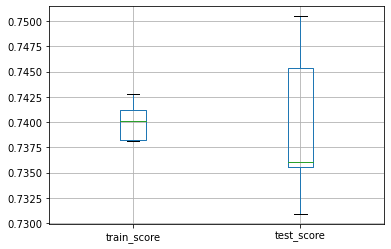

In [26]:
df_scores_LR = cross_validate(grid_log, X, y, scoring='roc_auc', cv=5, return_train_score=True)
df_scores_LR = pd.DataFrame(df_scores_LR)
df_scores_LR[['train_score', 'test_score']].boxplot()

In [27]:
df_scores_LR[['train_score', 'test_score']]

,train_score,test_score
0,0.741169,0.735608
1,0.740143,0.736083
2,0.738230,0.745367
3,0.738122,0.750482
4,0.742781,0.730907


#### SGD Classifier

Tuning parameters in SGD Regression

In [28]:
param_grid_SGD = {
    'classifier': [SGDClassifier(max_iter=1000, random_state=3)],
     'classifier__penalty': ['l1', 'l2','elasticnet'],
     'classifier__alpha': [0.00001, 0.0000095, 0.000009,0.0000085,0.000008]}
grid_SGD = GridSearchCV(pipe, param_grid=param_grid_SGD,scoring ='roc_auc', cv=5, n_jobs=-1)
grid_SGD.fit(X_train_res, y_train_res)
print("Best params:\n{}\n".format(grid_SGD.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_SGD.best_score_))
print("Test-set score: {:.5f}".format(grid_SGD.score(X_test, y_test)))

Best params:
{'classifier': SGDClassifier(alpha=8.5e-06, penalty='l1', random_state=3), 'classifier__alpha': 8.5e-06, 'classifier__penalty': 'l1'}

Best cross-validation score: 0.73996
Test-set score: 0.66560


Heatmap showing the best combination of the above params. Going forward we wanted to study the impact of changing alpha and penalty. So, we plotted the heat map of penalty versus alpha. Increasing or decreasing either of them decreases the test set score. We get the best test score for alpha = 0.000085 and L1 penalty

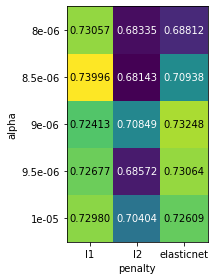

In [143]:
df_grid_SGD = pd.DataFrame(grid_SGD.cv_results_)
scores = np.array(df_grid_SGD.mean_test_score).reshape(5, 3)
mglearn.tools.heatmap(scores, xlabel='penalty', xticklabels=param_grid_SGD['classifier__penalty'],
                      ylabel='alpha', yticklabels=param_grid_SGD['classifier__alpha'], fmt = '%0.5f',cmap="viridis")
plt.tight_layout()

In [30]:
y_pred = grid_SGD.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy=accuracy_score(y_test,y_pred)

In [31]:
accuracy

0.565

The below figure shows the boxplot for the complete data set based on cross validation score. 
When cross validated against the whole dataset, we received the training and test score as shown below. The box plot shows the distribution of scores, the training score mostly lies around 0.705 - 0.735, whereas the test score lies between 0.705 - 0.725. The train scores and test scores have about similar scores 

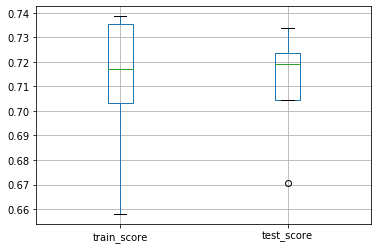

In [32]:
df_scores_SGD = cross_validate(grid_SGD, X, y, scoring='roc_auc', cv=5, return_train_score=True)
df_scores_SGD = pd.DataFrame(df_scores_SGD)
df_scores_SGD[['train_score', 'test_score']].boxplot()

In [33]:
df_scores_SGD[['train_score', 'test_score']]

,train_score,test_score
0,0.703287,0.704267
1,0.738555,0.733703
2,0.657977,0.670683
3,0.717104,0.723463
4,0.735310,0.719191


##### Gradient Boosting Classifier

Tuning parameters in Gradient Boosting Classifier

In [119]:
param_grid_GB = {'classifier': [GradientBoostingClassifier(random_state=3)],
      'classifier__n_estimators': [20,30,40,50,60], 'classifier__max_depth': [2,3,4,5,6]}
grid_GB = GridSearchCV(pipe, param_grid=param_grid_GB, scoring = 'roc_auc',cv=5, n_jobs=-1, return_train_score=True)
grid_GB.fit(X_train, y_train)
print("Best params:\n{}\n".format(grid_GB.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_GB.best_score_))
print("Test-set score: {:.5f}".format(grid_GB.score(X_test, y_test)))

Best params:
{'classifier': GradientBoostingClassifier(max_depth=4, n_estimators=30, random_state=3), 'classifier__max_depth': 4, 'classifier__n_estimators': 30}

Best cross-validation score: 0.83344
Test-set score: 0.83098


Heatmap showing the best combination of the above params. Going forward we wanted to study the impact of changing depth and number of estimator. So, we plotted the heat map of depth versus number of estimators. Increasing or decreasing either of them decreases the test set score. We get the best test score for depth = 4 and estimators = 30

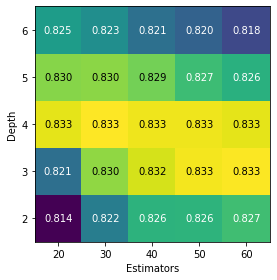

In [120]:
df_grid_GB = pd.DataFrame(grid_GB.cv_results_)
scores = np.array(df_grid_GB.mean_test_score).reshape(5, 5)
mglearn.tools.heatmap(scores, xlabel='Estimators', xticklabels=param_grid_GB['classifier__n_estimators'],
                      ylabel='Depth', yticklabels=param_grid_GB['classifier__max_depth'], fmt = '%0.5f',cmap="viridis")
plt.tight_layout()

In [121]:
y_pred = grid_GB.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy=accuracy_score(y_test,y_pred)

In [122]:
accuracy

0.8295

The below figure shows the boxplot for the complete data set based on cross validation score. 
When cross validated against the whole dataset, we received the training and test score as shown below. The box plot shows the distribution of scores, the training score mostly lies around 0.85 - 0.855, whereas the test score lies between 0.835. The train scores and test scores have about similar scores 

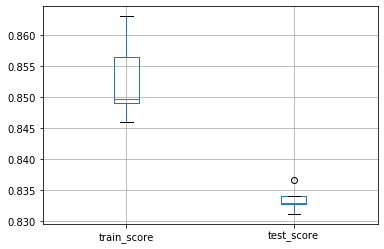

In [123]:
df_scores_GB = cross_validate(grid_GB, X, y, scoring='roc_auc', cv=5, return_train_score=True)
df_scores_GB = pd.DataFrame(df_scores_GB)
df_scores_GB[['train_score', 'test_score']].boxplot()

In [124]:
df_scores_GB[['train_score', 'test_score']]

,train_score,test_score
0,0.849585,0.832851
1,0.856439,0.833975
2,0.862988,0.832684
3,0.848978,0.836537
4,0.845937,0.831092


#### SVM

Tuning parameters in SVM

In [146]:
param_grid_SVM = {'classifier': [SVC(random_state=3)],
     'classifier__gamma': [0.1,1,10],
     'classifier__C': [0.01,0.1,1]}
grid_SVM = GridSearchCV(pipe, param_grid=param_grid_SVM,scoring='roc_auc', cv=5, n_jobs=-1, return_train_score=True)
grid_SVM.fit(X_train_res, y_train_res)
print("Best params:\n{}\n".format(grid_SVM.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_SVM.best_score_))
print("Test-set score: {:.5f}".format(grid_SVM.score(X_test, y_test)))

Best params:
{'classifier': SVC(C=0.01, gamma=10, random_state=3), 'classifier__C': 0.01, 'classifier__gamma': 10}

Best cross-validation score: 0.85270
Test-set score: 0.70964


Heatmap showing the best combination of the above params. Going forward we wanted to study the impact of changing C and gamma. So, we plotted the heat map of C versus gamma. Increasing or decreasing either of them decreases the test set score. We get the best test score for C = 0.1 and gamma = 10

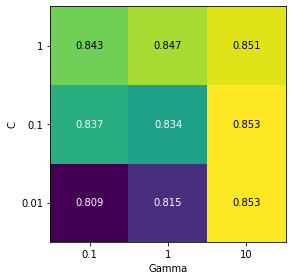

In [147]:
df_grid_SVM = pd.DataFrame(grid_SVM.cv_results_)
scores = np.array(df_grid_SVM.mean_test_score).reshape(3, 3)
mglearn.tools.heatmap(scores, xlabel='Gamma', xticklabels=param_grid_SVM['classifier__gamma'],
                      ylabel='C', yticklabels=param_grid_SVM['classifier__C'], fmt = '%0.3f',cmap="viridis")
plt.tight_layout()

In [148]:
y_pred = grid_SVM.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy=accuracy_score(y_test,y_pred)

In [149]:
accuracy

0.764

The below figure shows the boxplot for the complete data set based on cross validation score. 
When cross validated against the whole dataset, we received the training and test score as shown below. The box plot shows the distribution of scores, the training score mostly lies around 0.805 - 0.81, whereas the test score lies between 0.79 and 0.795. The train scores and test scores have about similar scores 

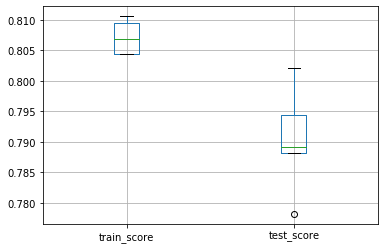

In [150]:
df_scores_SVM = cross_validate(grid_SVM, X, y, scoring='roc_auc', cv=5, return_train_score=True)
df_scores_SVM = pd.DataFrame(df_scores_SVM)
df_scores_SVM[['train_score', 'test_score']].boxplot()

In [151]:
df_scores_SVM[['train_score', 'test_score']]

,train_score,test_score
0,0.810597,0.778188
1,0.806846,0.788243
2,0.804490,0.802067
3,0.809428,0.789245
4,0.804374,0.794394


##### MLP Classifier

Tuning parameters in MLP

In [37]:
param_grid_MLP = [{'classifier': [MLPClassifier(max_iter=1000, random_state=3)],
      'classifier__hidden_layer_sizes': [(5,),(10,)], 'classifier__activation': ['tanh', 'relu'],
    'classifier__solver': ['sgd', 'adam'],'classifier__alpha': [0.0001, 0.05],
              'classifier__learning_rate': ['constant','adaptive']}]

gridMLP = GridSearchCV(pipe, param_grid = param_grid_MLP, scoring='roc_auc', cv=5)
gridMLP.fit(X_train_res, y_train_res)

print("Best params:\n{}\n".format(gridMLP.best_params_))
print("Best cross-validation score: {:.5f}".format(gridMLP.best_score_))
print("Test-set score: {:.5f}".format(gridMLP.score(X_test, y_test)))

Best params:
{'classifier': MLPClassifier(alpha=0.05, hidden_layer_sizes=(10,), max_iter=1000,
              random_state=3), 'classifier__activation': 'relu', 'classifier__alpha': 0.05, 'classifier__hidden_layer_sizes': (10,), 'classifier__learning_rate': 'constant', 'classifier__solver': 'adam'}

Best cross-validation score: 0.84560
Test-set score: 0.81812


In [38]:
y_pred = gridMLP.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy=accuracy_score(y_test,y_pred)

In [39]:
accuracy

0.742

The below figure shows the boxplot for the complete data set based on cross validation score. 
When cross validated against the whole dataset, we received the training and test score as shown below. The box plot shows the distribution of scores, the training score mostly lies around 0.836, whereas the test score lies between 0.83 and 0.832. The train scores and test scores have about similar scores 

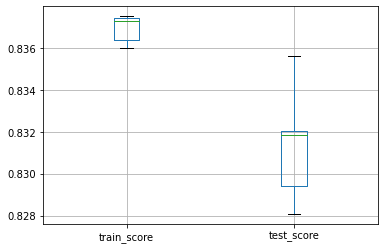

In [40]:
df_scores_MLP = cross_validate(gridMLP, X, y, scoring='roc_auc', cv=5, return_train_score=True)
df_scores_MLP = pd.DataFrame(df_scores_MLP)
df_scores_MLP[['train_score', 'test_score']].boxplot()

In [41]:
df_scores_MLP[['train_score', 'test_score']]

,train_score,test_score
0,0.837430,0.831828
1,0.836364,0.832055
2,0.837289,0.829427
3,0.836010,0.835615
4,0.837504,0.828081


#####  LGBM

Tuning the num_leaves and learning rate, while fixing the maximum depth.

In [22]:
param_grid = [{'classifier': [LGBMClassifier(random_state=3)],
      'classifier__num_leaves': [50,100,150, 200], 'classifier__max_depth': [7],
      'classifier__learning_rate': [0.1,0.2,0.3,0.6,0.8],'classifier__objective': ['binary'],
      'classifier__metric' : ['auc']}]

gridLGBM = GridSearchCV(pipe, param_grid, scoring='roc_auc', cv=5)
gridLGBM.fit(X_train_res, y_train_res)

print("Best params:\n{}\n".format(gridLGBM.best_params_))
print("Best cross-validation score: {:.4f}".format(gridLGBM.best_score_))
print("Test-set score: {:.2f}".format(gridLGBM.score(X_test, y_test)))

Best params:
{'classifier': LGBMClassifier(learning_rate=0.3, max_depth=7, metric='auc', num_leaves=150,
               objective='binary', random_state=3), 'classifier__learning_rate': 0.3, 'classifier__max_depth': 7, 'classifier__metric': 'auc', 'classifier__num_leaves': 150, 'classifier__objective': 'binary'}

Best cross-validation score: 0.8887
Test-set score: 0.79


Collecting all the cross validation scores for the above combination of learning rate and gamma

In [23]:
df_grid_LGBM = pd.DataFrame(gridLGBM.cv_results_)
scores_LGBM = np.array(df_grid_LGBM.mean_test_score).reshape(5,4)
scores_LGBM

array([[0.87750654, 0.8784068 , 0.8784068 , 0.8784068 ],
       [0.88619904, 0.88515732, 0.88515732, 0.88515732],
       [0.88668861, 0.88865771, 0.88867508, 0.88867508],
       [0.88642134, 0.88432261, 0.88432261, 0.88432261],
       [0.88410623, 0.88559094, 0.88559094, 0.88559094]])

Heatmap showing the best combination of the above params

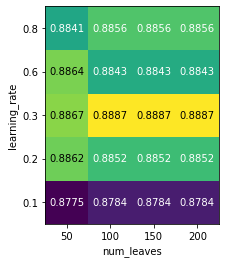

In [24]:
mglearn.tools.heatmap(scores_LGBM, ylabel='learning_rate', yticklabels=param_grid[0]['classifier__learning_rate'],
                      xlabel='num_leaves', xticklabels=param_grid[0]['classifier__num_leaves'], 
                      cmap="viridis", fmt='%0.4f')

Boxplot of the complete data set based on cross validation score

<AxesSubplot:>

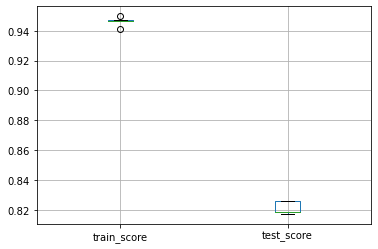

In [25]:
df_scores_LGBM = cross_validate(gridLGBM, X, y, scoring='roc_auc', cv=5, return_train_score=True)
df_scores_LGBM = pd.DataFrame(df_scores_LGBM)
df_scores_LGBM[['train_score', 'test_score']].boxplot()

In [26]:
df_scores_LGBM[['train_score', 'test_score']]

,train_score,test_score
0,0.941470,0.818503
1,0.946963,0.817176
2,0.949709,0.825798
3,0.946547,0.825591
4,0.946704,0.818372


When cross validated against the whole dataset, we received the training and test score as shown above. The box plot shows the distribution of scores with the training score mostly lies around 0.94, whereas the test score lies around 0.82. The train scores and test scores have about 12% difference on average.

In [27]:
print("Best cross-validation score: {:.2f}".format(gridLGBM.best_score_))
print("Test-set score: {:.2f}".format(gridLGBM.score(X_test, y_test)))

Best cross-validation score: 0.89
Test-set score: 0.79


#####  XGB Classifier

Tuning various parameters in XGBoost

In [22]:
param_grid = [{'classifier': [XGBClassifier(use_label_encoder=False, random_state=3, booster='gbtree',
                eval_metric='auc')],'classifier__n_estimators': [200,300], 
               'classifier__max_depth': [5, 7],'classifier__learning_rate': [0.10,0.15],
               'classifier__min_child_weight': [1, 3], 'classifier__gamma':[0.1,0.2,0.3]}]

gridXGB = GridSearchCV(pipe, param_grid, scoring='roc_auc', cv=5)
gridXGB.fit(X_train_res, y_train_res)

print("Best params:\n{}\n".format(gridXGB.best_params_))
print("Best cross-validation score: {:.2f}".format(gridXGB.best_score_))
print("Test-set score: {:.2f}".format(gridXGB.score(X_test, y_test)))

Best params:
{'classifier': XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, eval_metric='auc',
              gamma=0.2, gpu_id=None, importance_type='gain',
              interaction_constraints=None, learning_rate=0.15,
              max_delta_step=None, max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=3, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, use_label_encoder=False,
              validate_parameters=None, verbosity=None), 'classifier__gamma': 0.2, 'classifier__learning_rate': 0.15, 'classifier__max_depth': 7, 'classifier__min_child_weight': 1, 'classifier__n_estimators': 300}

Best cross-validation score: 0.90
Test-set score: 0.80


Checking whether increasing/ decreasing learning rate and gamma have any impact on the cross-validation score

In [27]:
param_grid = [{'classifier': [XGBClassifier(use_label_encoder=False, random_state=3, 
                max_depth=7, min_child_weight=1, n_estimators=200, booster='gbtree', eval_metric='auc')],
                'classifier__learning_rate': [0.10, 0.15, 0.3, 1.0], 
                'classifier__gamma':[0.0001, 0.1, 0.3, 0.5]}]
    

gridXGB = GridSearchCV(pipe, param_grid, scoring='roc_auc', cv=5)
gridXGB.fit(X_train_res, y_train_res)

print("Best params:\n{}\n".format(gridXGB.best_params_))

Best params:
{'classifier': XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, eval_metric='auc',
              gamma=0.1, gpu_id=None, importance_type='gain',
              interaction_constraints=None, learning_rate=0.3,
              max_delta_step=None, max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=3, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, use_label_encoder=False,
              validate_parameters=None, verbosity=None), 'classifier__gamma': 0.1, 'classifier__learning_rate': 0.3}



Collecting all the cross validation scores for the above combination of learning rate and gamma

In [29]:
df_grid = pd.DataFrame(gridXGB.cv_results_)
df_grid.mean_test_score

scores_XGB = np.array(df_grid.mean_test_score).reshape(4, 4)
scores_XGB

array([[0.88458815, 0.88962076, 0.89778051, 0.89748336],
       [0.88490681, 0.88939415, 0.89805216, 0.89309811],
       [0.88583005, 0.89165714, 0.89656258, 0.88582673],
       [0.88415484, 0.89022862, 0.8939277 , 0.88205469]])

Drawing the heatmap showing the best combination of the above params

Going forward we wanted to study the impact of changing gamma and learning rate. So, we plotted the heat map of gamma versus learning rate. Increasing or decreasing either of them decreases the test set score.We get the best test score for learning rate=0.3 and 
gamma=0.1

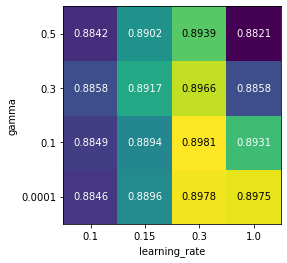

In [30]:
mglearn.tools.heatmap(scores_XGB, xlabel='learning_rate', xticklabels=param_grid[0]['classifier__learning_rate'],
                      ylabel='gamma', yticklabels=param_grid[0]['classifier__gamma'], 
                      cmap="viridis", fmt='%0.4f')

The below figure shows the boxplot for the complete data set based on cross validation score 

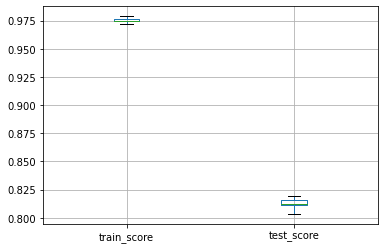

In [31]:
df_scores_XGB = cross_validate(gridXGB, X, y, scoring='roc_auc', cv=5, return_train_score=True)
df_scores_XGB = pd.DataFrame(df_scores_XGB)
df_scores_XGB[['train_score', 'test_score']].boxplot()

In [32]:
df_scores_XGB[['train_score', 'test_score']]

,train_score,test_score
0,0.978801,0.812676
1,0.974347,0.803401
2,0.974745,0.819445
3,0.976368,0.816229
4,0.972403,0.810979


When cross validated against the whole dataset, we received the training and test score as shown above. The box plot shows the distribution of scores, the training score mostly lies around 0.97, whereas the test score lies around 0.81. The train scores and test scores have about 16% difference on average. 

In [33]:
print("Best cross-validation score: {:.2f}".format(gridXGB.best_score_))
print("Test-set score: {:.2f}".format(gridXGB.score(X_test, y_test)))

Best cross-validation score: 0.90
Test-set score: 0.79


The best parameters out of these combinations with learning rate=0.15 and gamma=0.03 as well as the test set score as 0.80.


#### Best model computed by pipe:

In [34]:
pipe_num = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
preprocessor = make_column_transformer((pipe_num, col_num))

param_grid = [{'classifier': [XGBClassifier(use_label_encoder=False, random_state=3, 
                 booster='gbtree', eval_metric='auc', min_child_weight=1, n_estimators=200,
                 max_depth=7, gamma=0.1, learning_rate=0.3)]},
              {'classifier': [LGBMClassifier(max_depth=7, metric='auc', num_leaves=150, objective='binary',
                   random_state=3, learning_rate=0.3)]},
              {'classifier': [MLPClassifier(max_iter=1000, random_state=3,hidden_layer_sizes=(10,),
                             activation='relu', solver='adam', alpha=0.0001, learning_rate='constant' )]},
              {'classifier': [GradientBoostingClassifier(random_state=3, n_estimators=30, max_depth=4)]},
              {'classifier': [SVC(random_state=3, C=0.01, gamma=10)]}              
             ]

gridFinal = GridSearchCV(pipe, param_grid, scoring='roc_auc', cv=5)
gridFinal.fit(X_train_res, y_train_res)

print("Best params:\n{}\n".format(gridFinal.best_params_))
print("Best cross-validation score: {:.2f}".format(gridFinal.best_score_))
print("Test-set score: {:.2f}".format(gridFinal.score(X_test, y_test)))

Best params:
{'classifier': XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, eval_metric='auc',
              gamma=0.1, gpu_id=None, importance_type='gain',
              interaction_constraints=None, learning_rate=0.3,
              max_delta_step=None, max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=3, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, use_label_encoder=False,
              validate_parameters=None, verbosity=None)}

Best cross-validation score: 0.90
Test-set score: 0.79


### As multiple classifiers has test score in the range of 0.79, we took the best params from each model and arrived at the best model through grid search.
### In our case, XGBoost came out to be the best model.
